# **Marketing Campaign for Banking Products**

**Introduction to the Bank Personal Loan dataset:**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).

**A Little Overview of the dataset:**

We get **14 variables** in total of which:

*   **4 are continuous**
*   **2 are discrete**
*   **8 are categorical**

**Problem Statement Definition**

The bank has a growing customer base. **The bank wants to increase borrowers (asset customers)**  base to bring in more loan business and earn more through the interest on loans. So, the bank wants to convert the liability based customers to personal loan customers.**The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan.** This will increase the success ratio while at the same time reduce the cost of the campaign.

**Machine Learning Methodology – step by step**

We will follow these steps:

1.   Importing dataset and libraries
2.   Data cleaning and formatting
3.   EDA (Exploratory Data Analysis)
4.   Feature Engineering
5.   Training our model
6.   Building various other classification algorithms
7.   Compairing the performance of our models
8.   Business understanding of our model

# **1- Importing the dataset and libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import cov
from scipy import stats
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from google.colab import files
#uploaded=files.upload()

**Reading our dataset**

In [ ]:
# Reading the .csv file consisting of the bank records
df=pd.read_csv(r'/content/Loan_Modelling.csv')
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

# **2- Data cleaning and formatting**

Data cleaning and formatting will especially take care of:

*   Missing values
*   Wrong values
*   Wrong datatypes
*   Outliers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Checking the overall structure of the dataset.
df.shape

(5000, 14)

**Checking for missing values**

In [ ]:
# Checking for any null values.
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Checking the datatypes of variables**

In [ ]:
# Checking the data types of all variables.
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

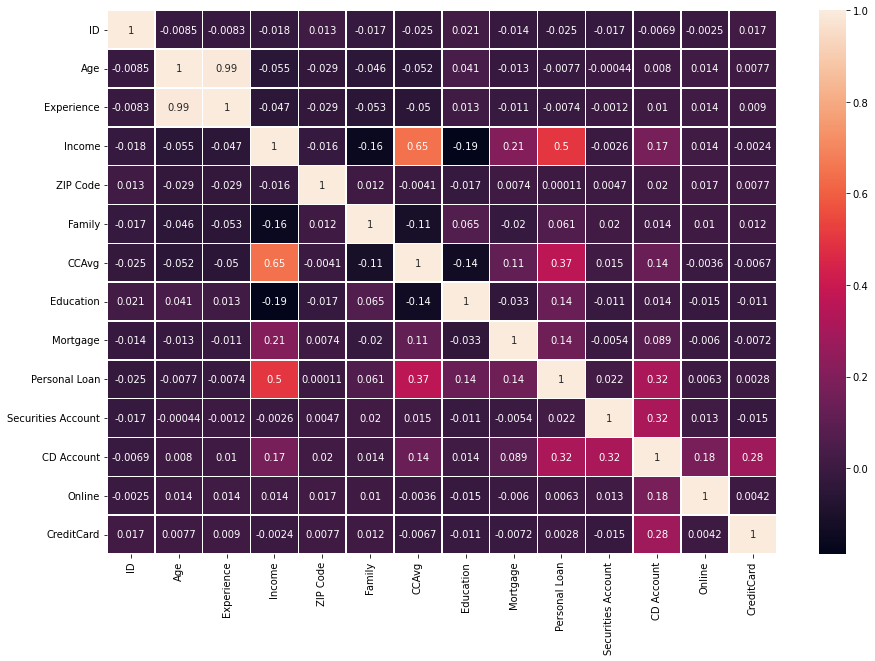

In [ ]:
# Plotting a heatmap of all variables of our dataset.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

**Taking care of wrong values**

*Experience cannot be negative, so we handle the incorrect experience records by replacing them with the median value.*

In [ ]:
df['Experience']=df['Experience'].apply(lambda x: df['Experience'].median() if x<0 else x)
df['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [ ]:
covariance=cov(df['Experience'],df['Age'])
print(covariance)

[[126.6308044  126.05195055]
 [126.05195055 131.40416627]]


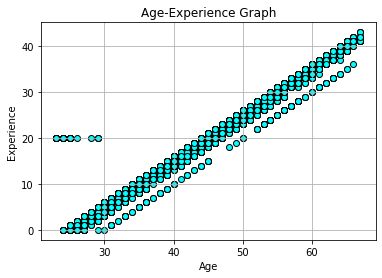

In [ ]:
# Making a scatter plot betwwen Experience and Age variables.
Age_v_Exp=plt.scatter(df['Age'],df['Experience'],c='Cyan',edgecolors='Black')
plt.title('Age-Experience Graph')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.grid(True)

*From the above graph we can see that Age and Experience are highly correlated. For the logistic regression model we should not have highly correlated data, so we will drop the Experience column.*

*Since ZIP Code has 467 unique values, it a nominal variable and hence it should be dropped.*

*Also the customer ID variable is noisy data and is irrelevant as it dosen't help our model in any way. So, we will also drop Customer ID column.*

**Dropping irrelevant columns**

In [ ]:
df=df.drop(['ID','ZIP Code','Experience'],axis=1)
df.info

<bound method DataFrame.info of       Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0      25      49       4    1.6          1         0              0   
1      45      34       3    1.5          1         0              0   
2      39      11       1    1.0          1         0              0   
3      35     100       1    2.7          2         0              0   
4      35      45       4    1.0          2         0              0   
...   ...     ...     ...    ...        ...       ...            ...   
4995   29      40       1    1.9          3         0              0   
4996   30      15       4    0.4          1        85              0   
4997   63      24       2    0.3          3         0              0   
4998   65      49       3    0.5          2         0              0   
4999   28      83       3    0.8          1         0              0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0

In [ ]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Checking skewness values of all variables to detect any outliers.
df.skew()

Age                  -0.029341
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

# **3- EDA (Exploratory Data Analysis)**

 **Displaying number of unique values in each column.**

In [ ]:
for i in ['Age','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
  print(i,':',df[i].nunique())

Age : 45
Income : 162
Family : 4
CCAvg : 108
Education : 3
Mortgage : 347
Personal Loan : 2
Securities Account : 2
CD Account : 2
Online : 2
CreditCard : 2


In [ ]:
# Displaying the number of bank customers with zero mortgage.
print('Number of people with zero mortgage:',len(df[df['Mortgage']==0]))

# Displays the number of customers with zero credit card spending per month.
print('\nNumber of people with zero credit card spending per month:',len(df[df['CCAvg']==0]))

Number of people with zero mortgage: 3462

Number of people with zero credit card spending per month: 106


**Value counts of categorical columns.**

In [ ]:
print('Value counts of all categorical data:')
for i in (['Family','Education','Securities Account','CD Account','Online','CreditCard']):
  print('\n',i,':')
  print(df[i].value_counts())


Value counts of all categorical data:

 Family :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

 Education :
1    2096
3    1501
2    1403
Name: Education, dtype: int64

 Securities Account :
0    4478
1     522
Name: Securities Account, dtype: int64

 CD Account :
0    4698
1     302
Name: CD Account, dtype: int64

 Online :
1    2984
0    2016
Name: Online, dtype: int64

 CreditCard :
0    3530
1    1470
Name: CreditCard, dtype: int64


**Univariate analysis**

*Let us take a look at the graphs of different variables.*

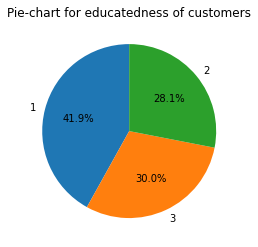

In [ ]:
plt.pie(df['Education'].value_counts(),startangle=90,labels=['1','3','2'],autopct='%1.1f%%')
plt.title('Pie-chart for educatedness of customers')
plt.show()

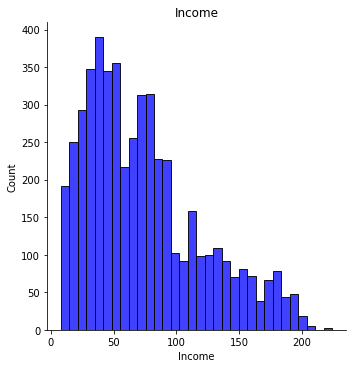

In [ ]:
# Graph of the income details of customers.
sns.displot(df['Income'],color='Blue')
plt.title('Income')
plt.show()

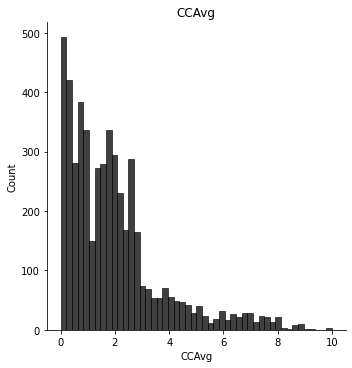

In [ ]:
# Average credit card spending of customer graph.
sns.displot(df['CCAvg'],color='Black')
plt.title('CCAvg')
plt.show()

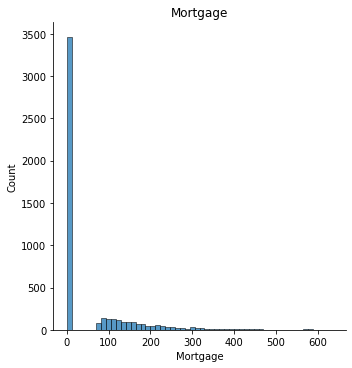

In [ ]:
# Graph on the mortgage of customers.
sns.displot(df['Mortgage'])
plt.title("Mortgage")
plt.show()

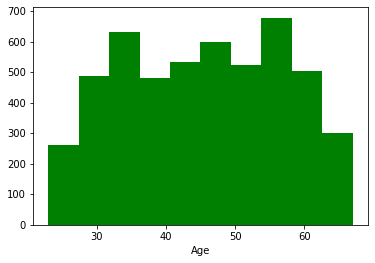

In [ ]:
# Histogram of the ages of customers.
plt.hist(df['Age'],bins=10,color='Green')
plt.xlabel('Age')
plt.show()

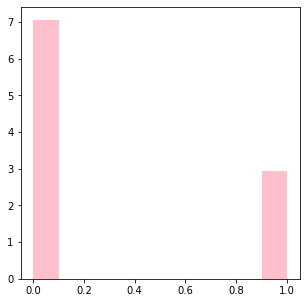

In [ ]:
# Histogram for the number of customers having credit cards.
plt.figure(figsize=(5,5))
plt.hist(df.CreditCard,density=True,color='Pink')
plt.show()

**Examining our Target variable**

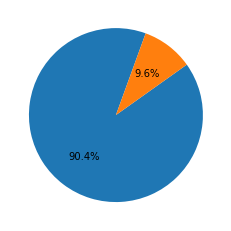

In [ ]:
# Pie-chart representing percentage of customers getting Personal Loans.
plt.pie(df['Personal Loan'].value_counts(),autopct="%1.1f%%",startangle=70)
plt.show()

*Thus only 9.8% of our customers are eligible for getting a Personal Loan from our bank.*

**Bivariate/Multivariate analysis**

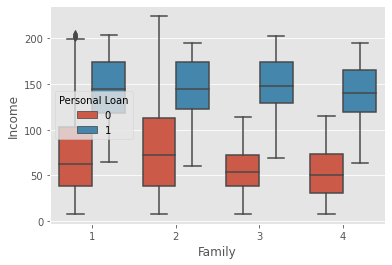

In [ ]:
# Box plot of Family, Income and Personal Loan of customer.
plt.style.use('ggplot')
f=df.loc[df['Personal Loan'].isin(['0','1'])]
sns.boxplot(x=df.Family,y=df.Income,hue=df['Personal Loan'],data=f)
plt.show()

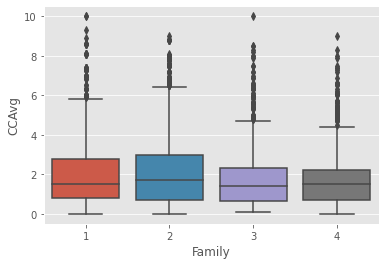

In [ ]:
# Box plot between Family and Average credit card spendings per month.
sns.boxplot(x=df.Family,y=df.CCAvg)
plt.show()

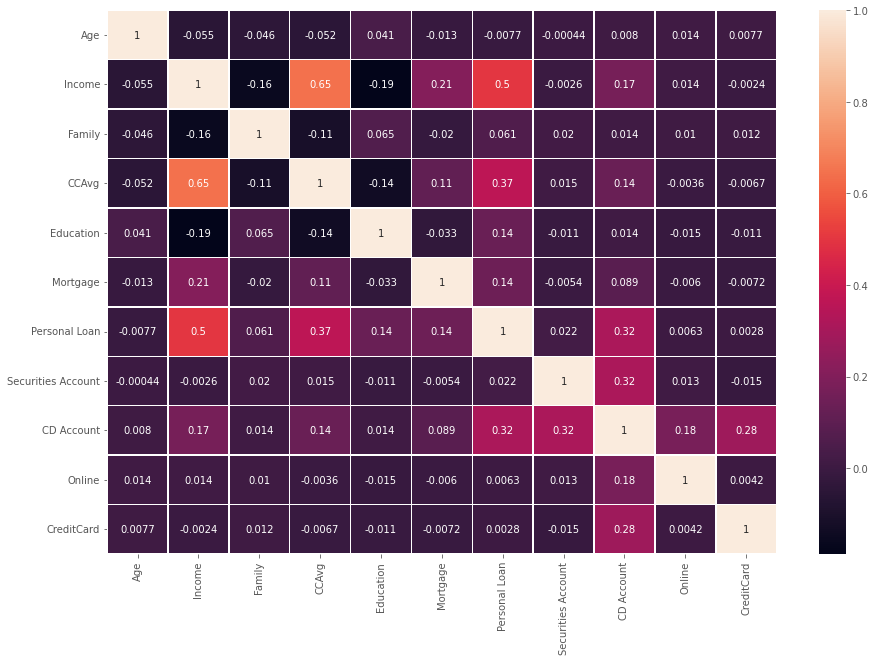

In [ ]:
# Plotting a heatmap of all variables of our dataset.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)


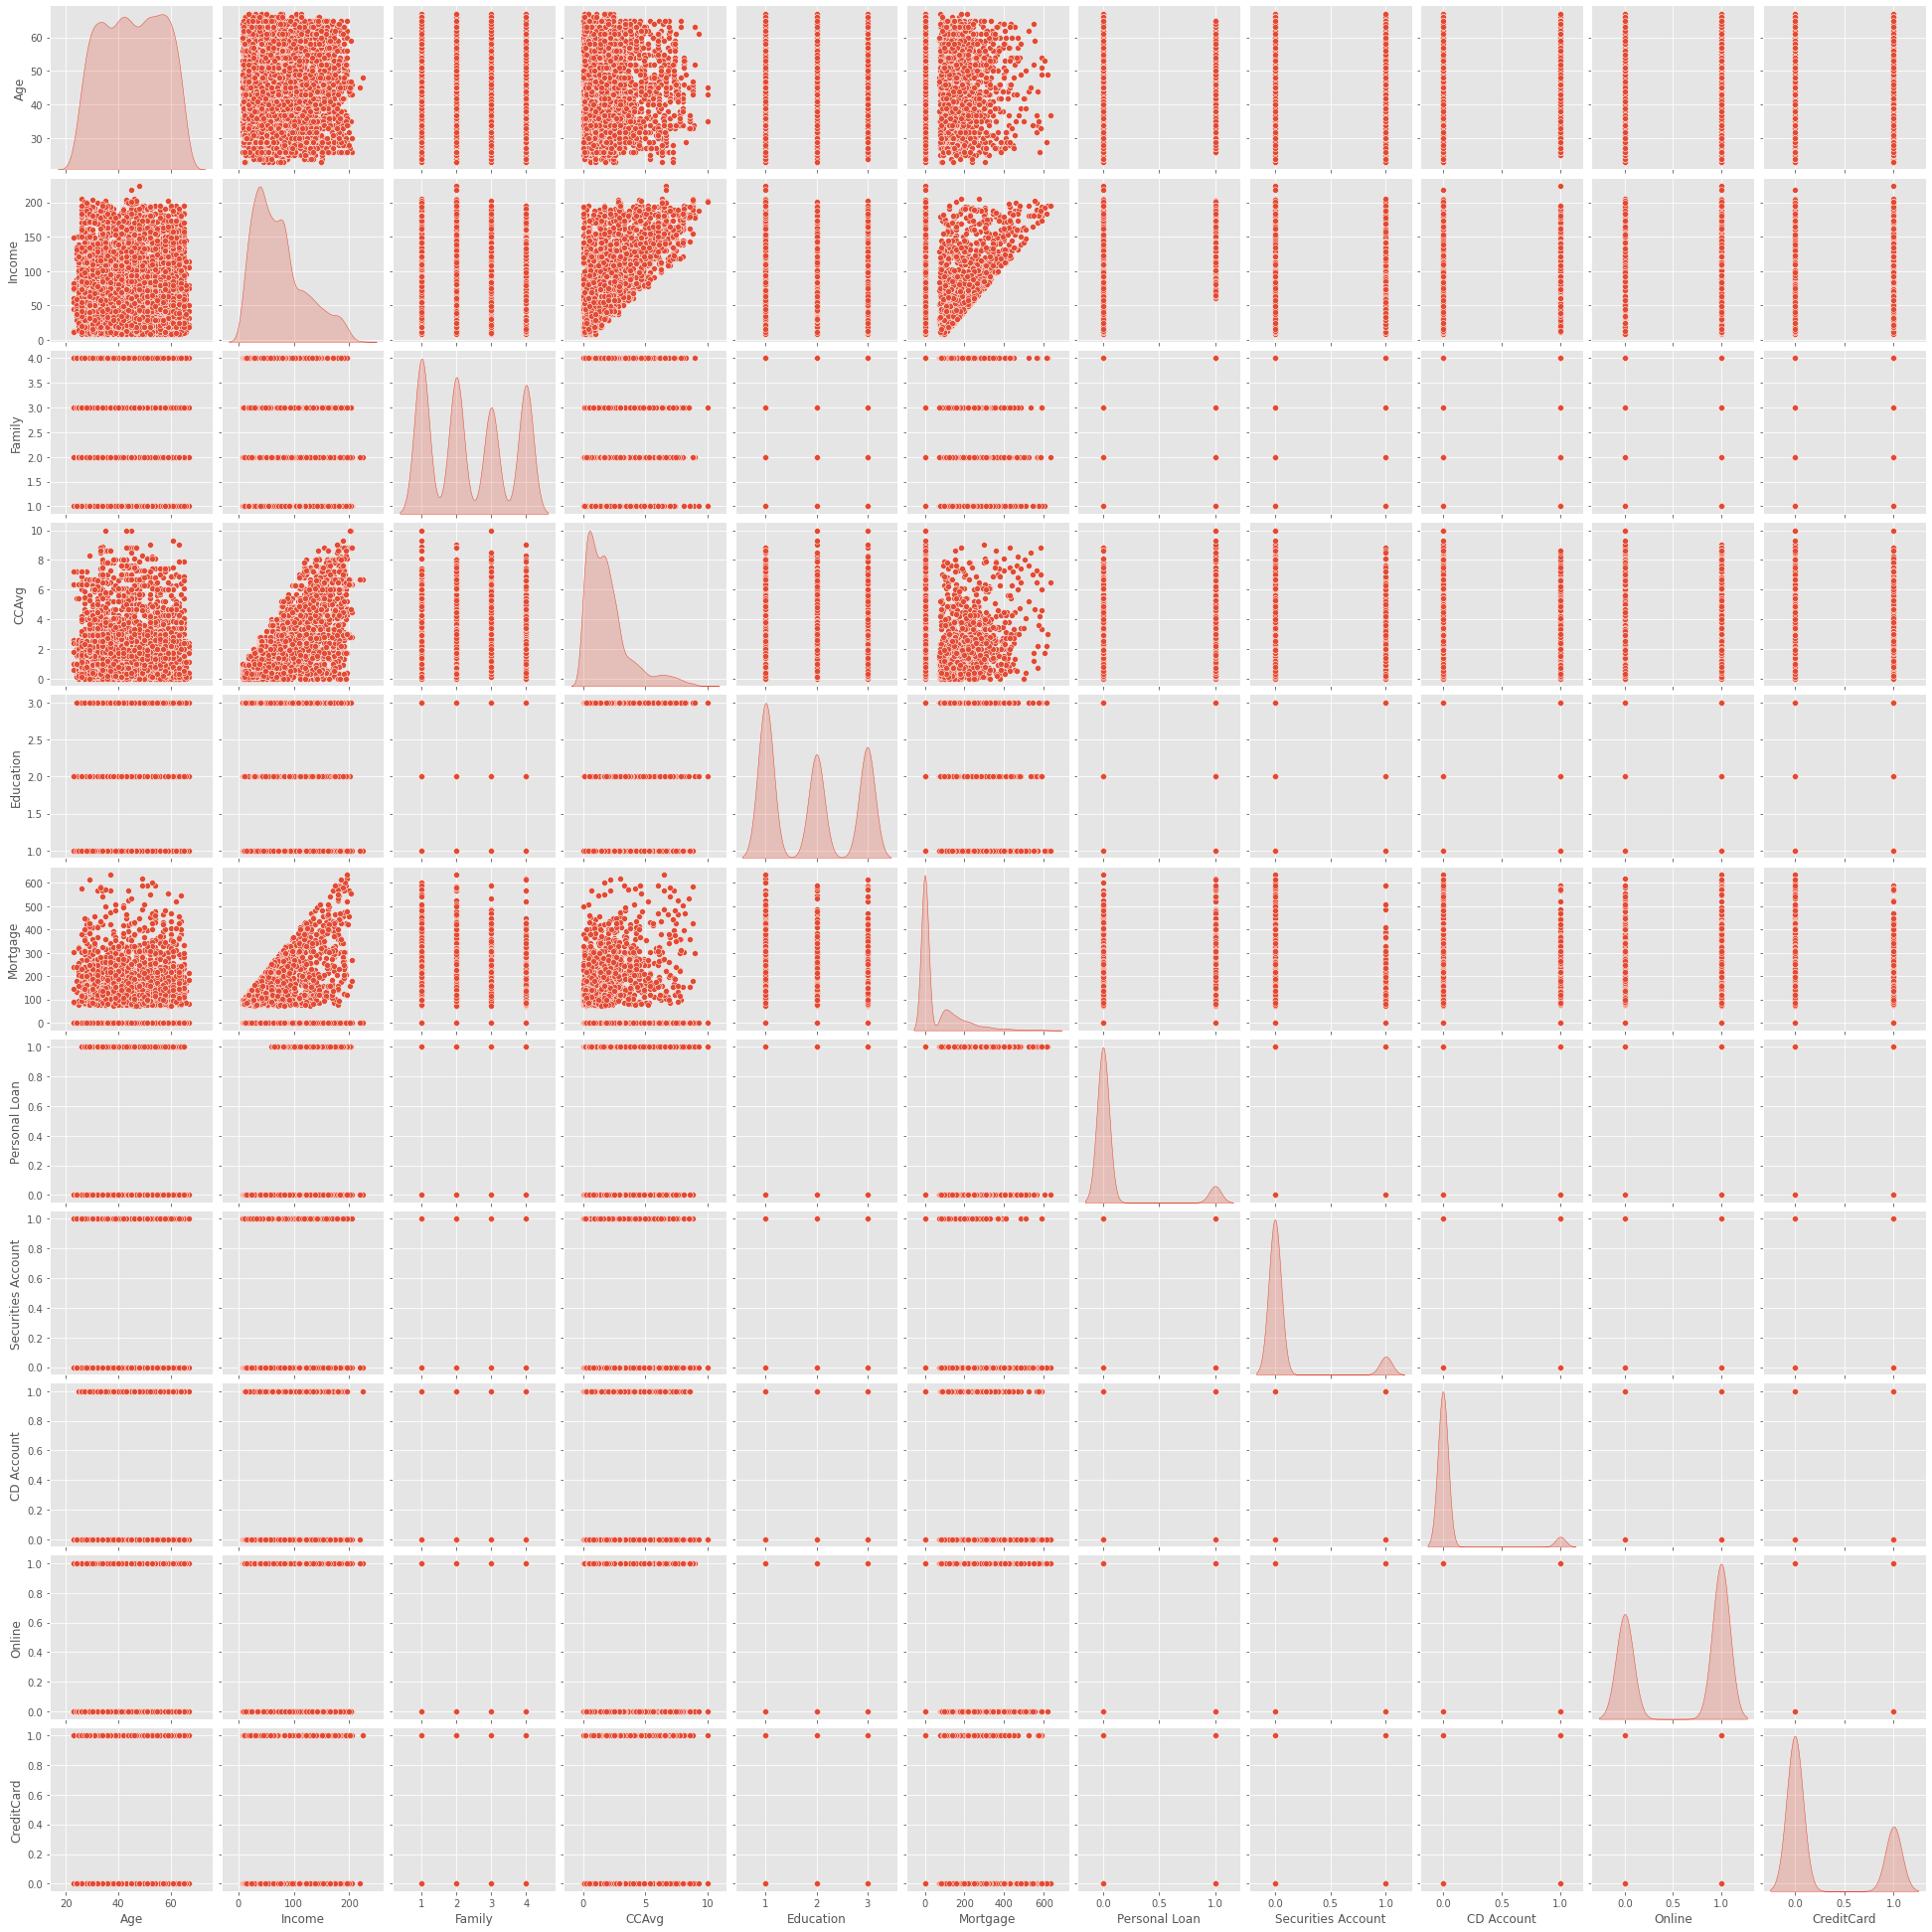

In [ ]:
# Plotting graphs between all variables.
sns.pairplot(df,diag_kind='kde')

# **4- Feature Engineering**

In [ ]:
# Checking the skewness values of all columns.
df.skew()

Age                  -0.029341
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

*From our EDA we saw that CCAvg and Mortgage have skewness values > 1, hence are rightly skewed. For Machine Learning models we need our features to have a Gaussian distrubution.*

*We will apply neccessary transformations to convert the skewed data into a Gaussian or Normal distribution.*

*For a normally distributed variable we must have skewness value between -1 and 1.*

**Applying Yeo-Johnson Power transformation on CCAvg and Income columns.**

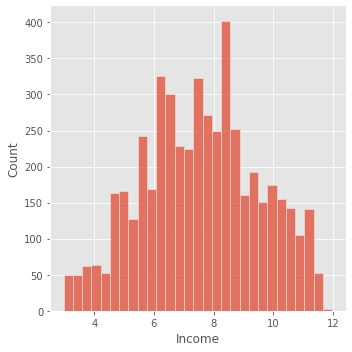

In [ ]:
# Applying Yeo-Jhonson power transformation on Income column.
ptransform_1=PowerTransformer(method='yeo-johnson',standardize=False)
ptransform_1.fit(df['Income'].values.reshape(-1,1))
df['Income']=ptransform_1.transform(df['Income'].values.reshape(-1,1))
sns.displot(df['Income'])

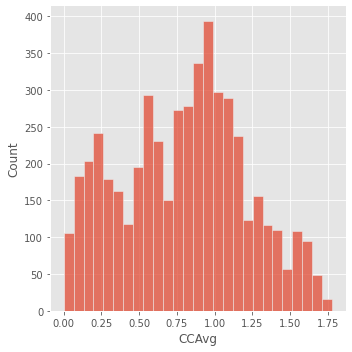

In [ ]:
# Applying Yeo-Jhonson power transformation on CCAvg column.
ptransform_2=PowerTransformer(method='yeo-johnson', standardize=False)
ptransform_2.fit_transform(df['CCAvg'].values.reshape(-1,1))
df['CCAvg']=ptransform_2.transform(df['CCAvg'].values.reshape(-1,1))
sns.displot(df.CCAvg)

*Now, both the Income and CCAvg column have slightly better distributions.*

In [ ]:
Y=df['Personal Loan']
X=df.drop('Personal Loan',axis=1)

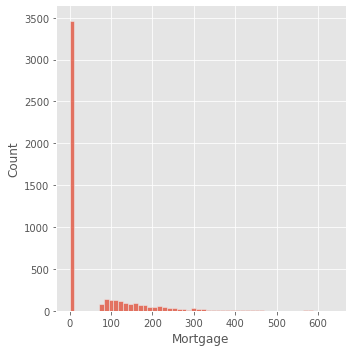

In [ ]:
# Plotting graph for Mortgage.
sns.displot(X['Mortgage'])

*From the graph of Mortgage above we can see that there is discontinuity in our graph. We do not want a discontinuous distribution, thus we will apply binning on our Mortgage column.*

*Binning method is used for smoothing of data or to handle noisy data. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins.*

In [ ]:
# We apply binning on Mortgage column.
X['Mortgage_val']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop(['Mortgage'],axis=1,inplace=True)
X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_val
0,25,6.827583,4,0.845160,1,1,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0


In [ ]:
df.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,7.561003,2.396400,0.795825,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,1.961533,1.147663,0.413304,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,2.972350,1.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,6.222469,1.000000,0.495350,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,7.585900,2.000000,0.814478,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,8.916412,3.000000,1.067713,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,11.976488,4.000000,1.779775,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,4,0.845160,1,0,0,1,0,0,0
1,45,5.876952,3,0.814478,1,0,0,1,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,0,0,1


**Scaling our data**

*The data shows us that there is highly varying magnitudes of all coulumns. We need to scale our data, otherwise our machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.*

*Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. *

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
trans=MinMaxScaler()
dataset=trans.fit_transform(X)
X=DataFrame(dataset)

*We do not need to transform variables Personal Loan, Securities Account and CD Account as they are categorical variables.*

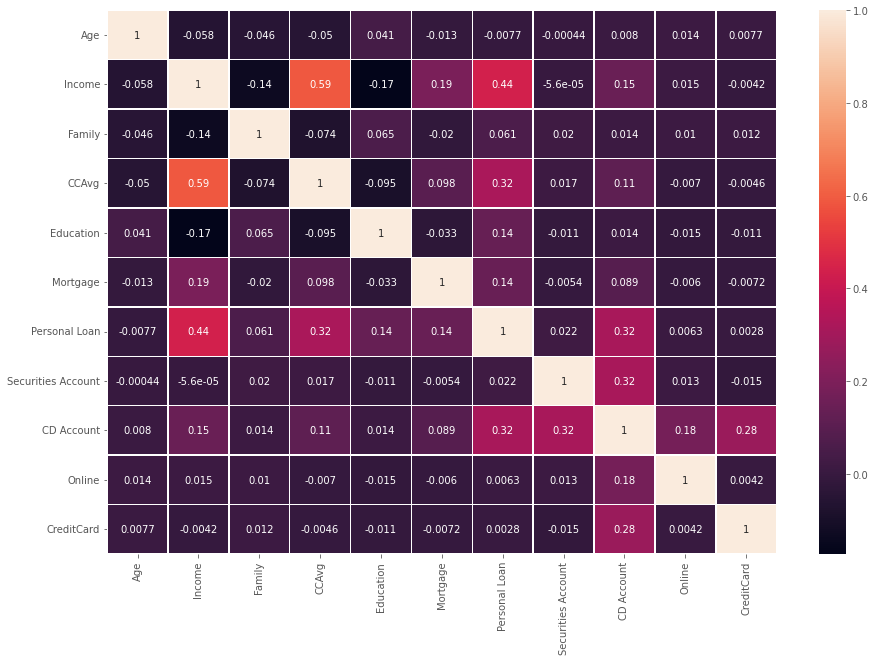

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

# **5- Training our model**

**1- Logistic Regression model**

**Splitting dataset into Train and Test data**

*We will split our dataset into train and test data in the ratio; 70% training data and 30% test data. Then we will use our model to make predictions.*

In [ ]:
# Splitting the dataset into train and test data.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0)

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9
3789,0.636364,0.231652,0.666667,0.180949,0.0,0.0,0.0,1.0,1.0,0.000000
758,0.931818,0.330569,0.000000,0.457630,0.5,1.0,0.0,0.0,0.0,0.000000
2868,0.659091,0.297577,1.000000,0.506963,0.0,0.0,0.0,1.0,1.0,0.000000
2550,0.204545,0.187597,0.000000,0.216120,1.0,0.0,0.0,1.0,0.0,0.166667
2150,0.886364,0.458088,0.000000,0.306055,0.0,1.0,0.0,0.0,1.0,0.000000


In [ ]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9
9,0.250000,0.902674,0.000000,0.968002,1.0,0.0,0.0,0.0,0.0,0.000000
461,0.727273,0.591958,0.333333,0.714662,0.0,1.0,0.0,0.0,0.0,0.000000
3700,0.568182,0.761829,0.000000,0.841410,0.0,1.0,0.0,0.0,0.0,0.000000
1559,0.818182,0.674918,1.000000,0.652991,0.5,0.0,0.0,1.0,0.0,0.166667
4558,0.477273,0.596245,0.333333,0.180949,0.0,0.0,0.0,1.0,1.0,0.000000


**Training and Testing our Logistic Regression model.**

In [ ]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Testing our Logistic Regression model.
y_pred=logistic_regression.predict(x_test)

**Evaluation of Logistice Regression model.**

*In this section we will evaluate our model with different parameters such as accuracy, precision, recall score, confusion matrix and ROC curve in order to mesure the performance of our model.*

**-> Test and Train dataset accuracy**

In [ ]:
# Displaying the accuracies of our model.
print('Accuracy of Logistic Regression model:')
print('Test data accuracy:',logistic_regression.score(x_test,y_test)*100)
print('Train data accuracy:',logistic_regression.score(x_train,y_train)*100)

Accuracy of Logistic Regression model:
Test data accuracy: 95.53333333333333
Train data accuracy: 95.34285714285714


*Thus our model has an accuracy of 95.53% on test dataset and an accuracy of 95.34% on train dataset.*

**-> Precision, Recall and F1 scores**

In [ ]:
# Evaluating the scores of our model.
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)
print('F1:',metrics.f1_score(y_test,y_pred)*100)

Precision: 91.39784946236558
Recall: 59.02777777777778
F1: 71.72995780590718


**-> Confusion Matrix**

*A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The*

In [ ]:
# Making a confusion matrix.
from sklearn import metrics
cnf_mat_1=metrics.confusion_matrix(y_test,y_pred)
print(cnf_mat_1)


[[1348    8]
 [  59   85]]


In [ ]:
# Count of test data.
y_test.count()

1500

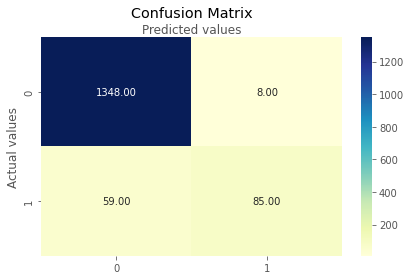

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(cnf_mat_1,annot=True,cmap="YlGnBu",fmt='.2f')
ax.xaxis.set_label_position("top")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.tight_layout()


*From the confusion matrix we observe that our model is predicting 1348 True Positives and 85 True Negative predictions. Which means our model makes 1348 + 85= 1433 correct predictions out of 1500.*

*It also shows us that our model makes 59 + 8 = 67 wrong predictions.*

*From the above accuracy, precision and recall scores we can observe that our model has high accuracy and precision and is working really well in making predictions.*

**-> ROC Curve**

*Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.*

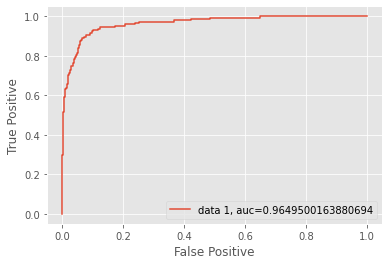

In [ ]:
y_pred_proba = logistic_regression.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc=4)
plt.show()

*AUC score for our Logistic Regression model is 0.96. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.*

# **6- Building various other classification algorithms**

**2- Decision Tree model**

In [ ]:
des_tree=DecisionTreeClassifier(random_state=0,max_depth=8)
des_tree=des_tree.fit(x_train,y_train)
y_pred_dt=des_tree.predict(x_test)

**-> Test and Train dataset accuracy**

In [ ]:
print('Accuracy scores of Descision Tree model:')
print('Train data accuracy:',des_tree.score(x_train,y_train)*100)
print('Train data accuracy:',des_tree.score(x_test,y_test)*100)

Accuracy scores of Descision Tree model:
Train data accuracy: 99.57142857142857
Train data accuracy: 98.2


The Decision Tree model has an accuracy of 99.57%, which is better than the Logistic Regression model.

**-> Precision, Recall and F1 scores**

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred_dt)*100)
print("Recall:",metrics.recall_score(y_test, y_pred_dt)*100)
print('F1:',metrics.f1_score(y_test,y_pred_dt)*100)

Precision: 90.3448275862069
Recall: 90.97222222222221
F1: 90.65743944636678


**-> Confusion Matrix**

In [ ]:
cnf_mat_2=metrics.confusion_matrix(y_test,y_pred_dt)
print(cnf_mat_2)

[[1342   14]
 [  13  131]]


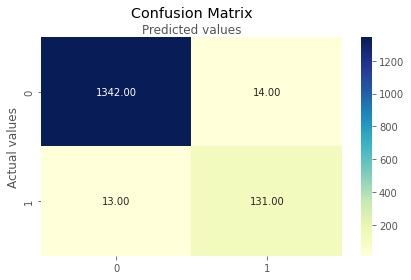

In [ ]:
fig_2, ax_2 = plt.subplots()
sns.heatmap(cnf_mat_2,annot=True,cmap="YlGnBu",fmt='.2f')
ax_2.xaxis.set_label_position("top")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.tight_layout()

From the confusion matrix we observe that the Decision Tree model has 1342 True Positives and 131 True Negatives. i.e it makes 1342 + 131 = 1473 correct predictions.

Also, the model predicts only 13 False Positives.

**-> ROC Curve**

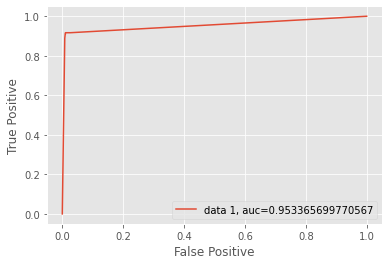

In [ ]:
y_pred_proba2 = des_tree.predict_proba(x_test)[::,1]
fpr2,tpr2,_=metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr2,tpr2,label="data 1, auc="+str(auc2))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc=4)
plt.show()

*AUC score for our Decision Tree model is 0.95.*

**3- Random Forest Classifier**

In [ ]:
rand_for=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)
rand_for=rand_for.fit(x_train,y_train)
y_pred_rf=rand_for.predict(x_test)

**-> Test and Train dataset accuracy**

In [ ]:
print('Accuracy scores of Random Forest Classifier:')
print('Train data accuracy:',rand_for.score(x_train,y_train)*100)
print('Test data accuracy:',rand_for.score(x_test,y_test)*100)


Accuracy scores of Random Forest Classifier:
Train data accuracy: 99.4857142857143
Test data accuracy: 98.73333333333333


**-> Precision, Recall and F1 scores**

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred_rf)*100)
print("Recall:",metrics.recall_score(y_test, y_pred_rf)*100)
print('F1:',metrics.f1_score(y_test,y_pred_rf)*100)

Precision: 98.44961240310077
Recall: 88.19444444444444
F1: 93.04029304029304


**-> Confusion Matrix**

In [ ]:
cnf_mat_3=metrics.confusion_matrix(y_test,y_pred_rf)
print(cnf_mat_3)

[[1354    2]
 [  17  127]]


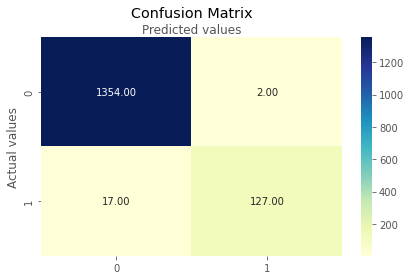

In [ ]:
fig_3, ax_3 = plt.subplots()
sns.heatmap(cnf_mat_3,annot=True,cmap="YlGnBu",fmt='.2f')
ax_3.xaxis.set_label_position("top")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.tight_layout()

From the confusion matrix we observe that the Random Forest Classifier has 1354 True Positives and 127 True Negatives

Also, the model predicts 17 false Positives which is less than Logistic Regression model.

**-> ROC Curve**

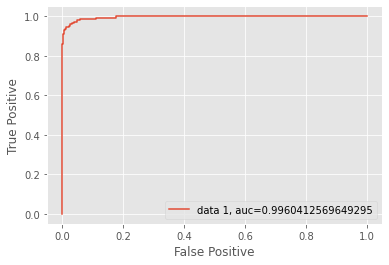

In [ ]:
y_pred_proba3 = rand_for.predict_proba(x_test)[::,1]
fpr3,tpr3,_=metrics.roc_curve(y_test,  y_pred_proba3)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr3,tpr3,label="data 1, auc="+str(auc3))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc=4)
plt.show()

*AUC score for our Random Forest Classifier is 0.99.*

# **7- Compairing the performance of our models**

*Creating a function to display performance parameters of all models.*

In [ ]:
from sklearn.model_selection import cross_validate
def models_evaluation(x,y,folds):
    log = cross_validate(logistic_regression, X, y, cv=folds)
    dtr = cross_validate(des_tree, X, y, cv=folds)
    rfc = cross_validate(rand_for, X, y, cv=folds)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[logistic_regression.score(x_train,y_train)*100,
                                                               logistic_regression.score(x_test,y_test)*100,
                                                               metrics.recall_score(y_test, y_pred)*100,
                                                               metrics.f1_score(y_test,y_pred)*100,
                                                               auc*100],

                                      'Decision Tree':[des_tree.score(x_train,y_train)*100,
                                                       des_tree.score(x_test,y_test)*100,
                                                       metrics.recall_score(y_pred,y_pred_dt)*100,
                                                       metrics.f1_score(y_test,y_pred_dt)*100,
                                                       auc2*100],

                                      'Random Forest':[rand_for.score(x_train,y_train)*100,
                                                       rand_for.score(x_test,y_test)*100,
                                                       metrics.recall_score(y_test, y_pred_rf)*100,
                                                       metrics.f1_score(y_test,y_pred_rf)*100,
                                                       auc3*100]},

                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score'],
                                      columns=['Logistic Regression','Decision Tree','Random Forest'])

    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

    # Return models performance metrics scores data frame
    return(models_scores_table)

In [ ]:
models_evaluation(X, Y, 3)

,Logistic Regression,Decision Tree,Random Forest,Best Score
Accuracy,95.342857,99.571429,99.485714,Decision Tree
Precision,95.533333,98.200000,98.733333,Random Forest
Recall,59.027778,90.322581,88.194444,Decision Tree
F1 Score,71.729958,90.657439,93.040293,Random Forest
AUC Score,96.495002,95.336570,99.604126,Random Forest


*The above table shows the different scores of the models together. We observe that the Decision Tree model has the highest accuracy and recall scores, whereas the Random Forest Classifier has the best precision, F1 and AUC score.*

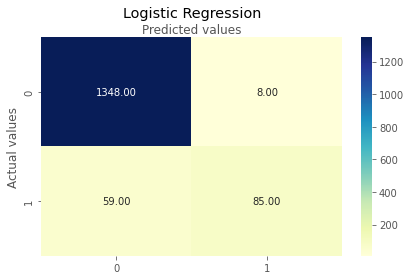

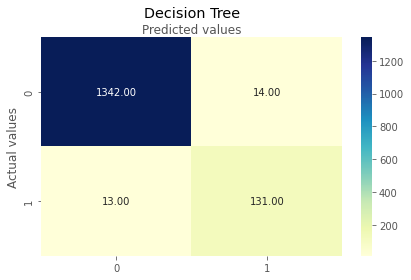

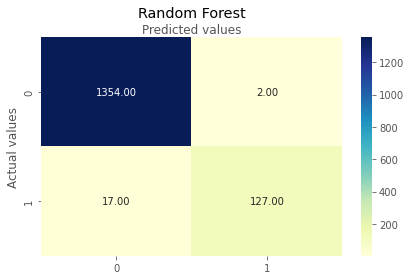

In [ ]:
# Displaying confusion matrices of all models.

#Logistic Regression
fig, ax = plt.subplots()
sns.heatmap(cnf_mat_1,annot=True,cmap="YlGnBu",fmt='.2f')
ax.xaxis.set_label_position("top")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Logistic Regression')
plt.tight_layout()


#Decision Tree
fig_2, ax_2 = plt.subplots()
sns.heatmap(cnf_mat_2,annot=True,cmap="YlGnBu",fmt='.2f')
ax_2.xaxis.set_label_position("top")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Decision Tree')
plt.tight_layout()


#Random Forest
fig_3, ax_3 = plt.subplots()
sns.heatmap(cnf_mat_3,annot=True,cmap="YlGnBu",fmt='.2f')
ax_3.xaxis.set_label_position("top")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random Forest')
plt.tight_layout()

*Summerizing all the matrices in  a table.*

In [ ]:
matrix_table=pd.DataFrame({'Logistic Regression' : [cnf_mat_1[0,0],
                                                    cnf_mat_1[0,1],
                                                    cnf_mat_1[1,0],
                                                    cnf_mat_1[1,1]],

                           'Decision Tree'  : [cnf_mat_2[0,0],
                                               cnf_mat_2[0,1],
                                               cnf_mat_2[1,0],
                                               cnf_mat_2[1,1]],

                           'Random Forest' : [cnf_mat_3[0,0],
                                              cnf_mat_3[0,1],
                                              cnf_mat_3[1,0],
                                              cnf_mat_3[1,1]]},
                          index=['True Positive','False Positive','False Negative','True Negative'],
                          columns=['Logistic Regression','Decision Tree','Random Forest'])

print(matrix_table)

                Logistic Regression  Decision Tree  Random Forest
True Positive                  1348           1342           1354
False Positive                    8             14              2
False Negative                   59             13             17
True Negative                    85            131            127


*Random Forest Classifier makes the hightest number of correct predictions which is 1481 compared to 1473 of Decision Tree and 1433 of Logistic Regression.*

# **8- Business understanding of our model**

We have in total 14 variables of which 4 are continuous (Income,CCAvg,etc.), 2 are discrete (Age,Experience) and 8 are categorical (Credit Card,Securities Account,etc.).

We found out that ID (customer ID) coulmn was just a continuous number and hence was noisy data and wasn't helping us in any way to predict if a personal loan should be given to a particular customer. So, we droppped the ID column.

The columns Age and Experience were highly correlated, and for a classification algorithm we should not have highly correlated columns in our data. Hence we droppped the Experience column so as to eliminate the correlation.
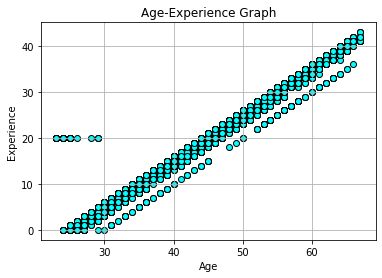

Also from the ZIP Code we observed that it had 467 different categories which means it was a nominal variable as there was no intrinsic ordering to the categories. Thus, we had to also drop the ZIP Code column.

During univariate and multivariate analysis:

The Pie-chart for educatedness of customers showed us that most of our customers, about 42% were undergraduates.

Customer Income and Average credit card spending per month had rightly-skewed graphs. To have normal distributions for them we applied Yeo-Jhonson power transformations.

Mortgage had a discontinuous graph. We don't need discontinuous graphs so we carried out binning on the mortgage column.

The confusion matrices of our models show us that the Decision Tree has the least number of False Negatives i.e the customers who are eligible for the personal loan but our model predicted that they won't get the personal loan.

From a bussiness point of view the number of such predictions should be as less as possible if you want to increase the number of borrowers and increase the success ratio for the growth of the bank.

The random forest classifier has only **4 False Negative more** than the decision tree model which is not very much and also the random forest classifier make more number of correct predictions than the decision tree model.

**CONCLUSION:**

Thus, we can conclude that the **Random Forest Classfier performs better** than the logistic regression and decision tree in predicting the potential customers that are more likely to take a loan which will help in the overall growth of the bank.

**What i learned from this project:**

*   I was really surprised to see how much effect removing just a few outliers and fixing the skewed distribution of the target variable had.
*   A lot of the gains I seem to have derived from trying, combining and tuning various classifiers rather than from feature engineering.
*   Most of my insights and learning came from making mistakes and fixing these. Especially be visualizing the relevant parts of the data.
*   The data set is comfortably small to allow for fast iteration and experimentation.



